In [28]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [59]:
data=pd.read_csv('Zoo.csv')

In [60]:
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [61]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [63]:
data['animal name'].value_counts()


frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64

In [64]:
#check if there are duplicates in animal_name
duplicates = data['animal name'].value_counts()
duplicates[duplicates > 1]

frog    2
Name: animal name, dtype: int64

In [65]:
data=data.drop_duplicates()

In [66]:
data['animal name'].value_counts()

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64

In [67]:
frog = data[data['animal name'] == 'frog']
frog

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [68]:
# observation: find that one frog is venomous and another one is not 
# change the venomous one into frog2 to seperate 2 kinds of frog 
data['animal name'][(data['venomous'] == 1 )& (data['animal name'] == 'frog')] = "frog2"

In [69]:
data['venomous'].value_counts()

0    93
1     8
Name: venomous, dtype: int64

In [93]:
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [73]:
import seaborn as sns


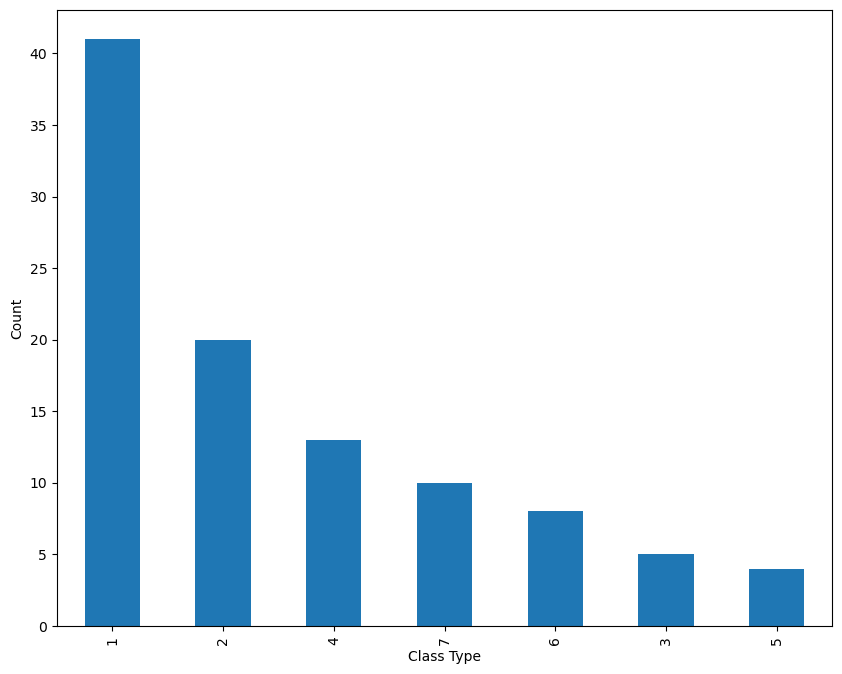

In [74]:
plt.figure(figsize=(10,8));
data.type.value_counts().plot(kind="bar");
plt.xlabel('Class Type');
plt.ylabel("Count");
plt.plot();

We can see that most of the animals are Class Type-1

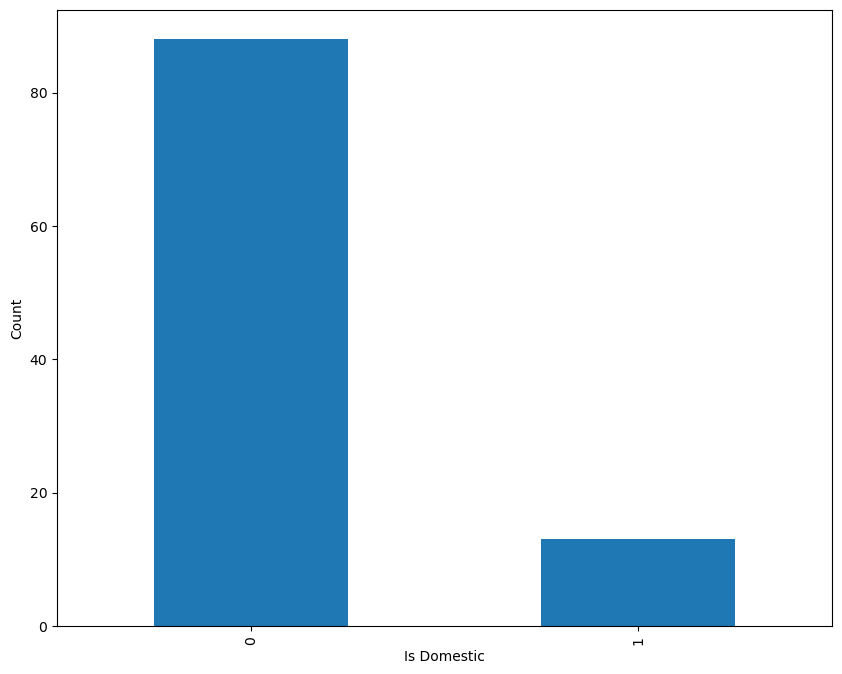

In [75]:
#Lets plot how many animals are domestic or not
plt.figure(figsize=(10,8));
data.domestic.value_counts().plot(kind="bar");
plt.xlabel('Is Domestic');
plt.ylabel("Count");
plt.plot();

Most of the animals are not domestic type

In [77]:
pd.crosstab(data.type, data.domestic)

domestic,0,1
type,,
1,33,8
2,17,3
3,5,0
4,12,1
5,4,0
6,7,1
7,10,0


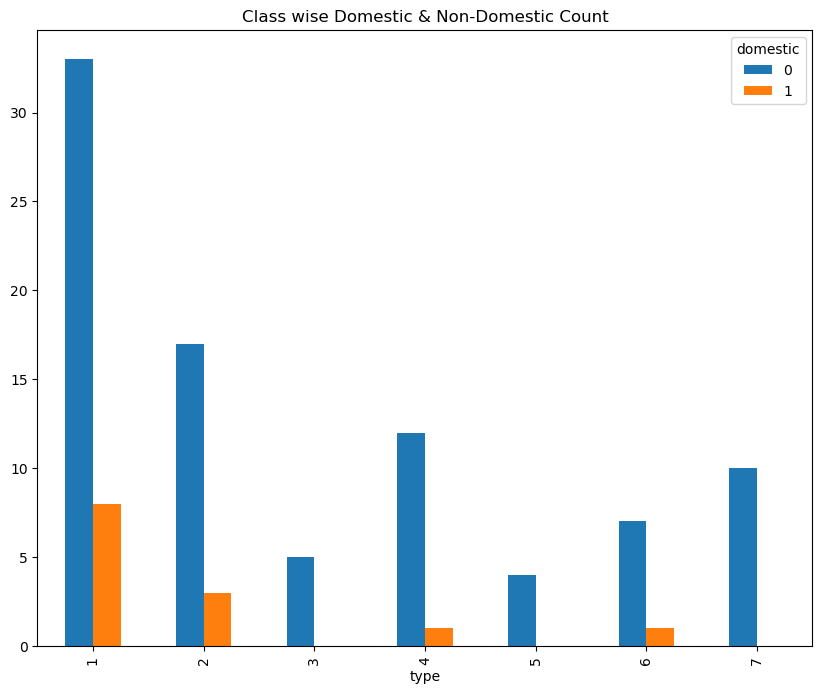

In [78]:
# Lets see species wise domestic and non-domestic animals
pd.crosstab(data.type, data.domestic).plot(kind="bar", figsize=(10, 8), title="Class wise Domestic & Non-Domestic Count");
plt.plot();

In [79]:
# Lets see how many animals provides us milk
data.milk.value_counts()

0    60
1    41
Name: milk, dtype: int64

In [83]:
pd.crosstab(data.type, data.milk)

milk,0,1
type,,
1,0,41
2,20,0
3,5,0
4,13,0
5,4,0
6,8,0
7,10,0


# So we can observer here only mammals provides milk, which is really a scientific true so assuming Type - 1 is mammals . 
# our data exploration is going good till now...

In [85]:
# Lets see how many animals live under water. i.e aquatic
# lets find out all the aquatic animals.
data.aquatic.value_counts() # only 36 aquatic animals are there.
# lets see there class.

0    65
1    36
Name: aquatic, dtype: int64

In [87]:
data[data.aquatic==1].type.value_counts()

4    13
7     6
1     6
2     6
5     4
3     1
Name: type, dtype: int64

In [88]:
data.venomous.value_counts()

0    93
1     8
Name: venomous, dtype: int64

In [89]:
# In our dataset we have 8 venomous. Lets see their class
pd.crosstab(data.type, data.venomous)

venomous,0,1
type,,
1,41,0
2,20,0
3,3,2
4,12,1
5,3,1
6,6,2
7,8,2


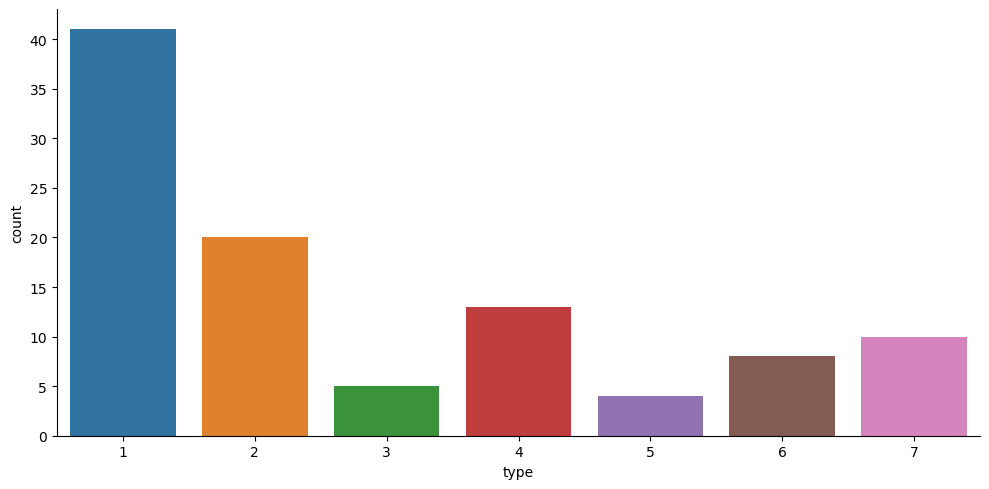

In [91]:
#use seaborn to plot the count of each 7 class_type
sns.factorplot('type', data=data, kind="count",size = 5,aspect = 2)


In [105]:
colname=[]
for x in data.columns:
    if data[x].dtype=='object':
        colname.append(x)
colname        

['animal name']

In [106]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for x in colname:
    data[x]=le.fit_transform(data[x])
    
    
    le_name_mapping=dict(zip(le.classes_,le.transform(le.classes_)))
    print('Feature',x)
    print('mapping',le_name_mapping)

Feature animal name
mapping {'aardvark': 0, 'antelope': 1, 'bass': 2, 'bear': 3, 'boar': 4, 'buffalo': 5, 'calf': 6, 'carp': 7, 'catfish': 8, 'cavy': 9, 'cheetah': 10, 'chicken': 11, 'chub': 12, 'clam': 13, 'crab': 14, 'crayfish': 15, 'crow': 16, 'deer': 17, 'dogfish': 18, 'dolphin': 19, 'dove': 20, 'duck': 21, 'elephant': 22, 'flamingo': 23, 'flea': 24, 'frog': 25, 'frog2': 26, 'fruitbat': 27, 'giraffe': 28, 'girl': 29, 'gnat': 30, 'goat': 31, 'gorilla': 32, 'gull': 33, 'haddock': 34, 'hamster': 35, 'hare': 36, 'hawk': 37, 'herring': 38, 'honeybee': 39, 'housefly': 40, 'kiwi': 41, 'ladybird': 42, 'lark': 43, 'leopard': 44, 'lion': 45, 'lobster': 46, 'lynx': 47, 'mink': 48, 'mole': 49, 'mongoose': 50, 'moth': 51, 'newt': 52, 'octopus': 53, 'opossum': 54, 'oryx': 55, 'ostrich': 56, 'parakeet': 57, 'penguin': 58, 'pheasant': 59, 'pike': 60, 'piranha': 61, 'pitviper': 62, 'platypus': 63, 'polecat': 64, 'pony': 65, 'porpoise': 66, 'puma': 67, 'pussycat': 68, 'raccoon': 69, 'reindeer': 70, 

In [112]:
X=data.iloc[:,0:17]
Y=data.iloc[:,17]

In [120]:
scaler=StandardScaler()

scaler.fit(X)
X = scaler.transform(X)

In [121]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [122]:
int(np.sqrt(len(X_train)))

8

In [123]:
model_KNN=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),
                              metric='euclidean')

In [124]:
model_KNN.fit(X_train,Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=8)

In [125]:
X_test

array([[ 0.99469179, -0.86103386,  2.01246118,  0.84372057, -0.82663978,
         1.79118211,  1.34370962,  0.89642146, -1.2349089 ,  0.46569032,
         0.51234754, -0.29329423, -0.44986771, -0.41594766,  0.58878406,
        -0.38435306, -0.87859537],
       [ 0.44589632,  1.16139451, -0.49690399,  0.84372057,  1.20971676,
        -0.55829053,  1.34370962,  0.89642146, -1.2349089 ,  0.46569032,
         0.51234754, -0.29329423, -0.44986771,  0.57253971,  0.58878406,
        -0.38435306,  1.13818037],
       [ 1.2004901 , -0.86103386, -0.49690399,  0.84372057, -0.82663978,
        -0.55829053,  1.34370962,  0.89642146, -1.2349089 , -2.14734979,
        -1.95180015, -0.29329423, -0.44986771,  1.0667834 , -1.69841555,
        -0.38435306, -0.87859537],
       [-0.37729689,  1.16139451, -0.49690399,  0.84372057, -0.82663978,
         1.79118211, -0.74420841, -1.1155467 , -1.2349089 , -2.14734979,
         0.51234754,  3.40954542, -0.44986771,  1.56102708, -1.69841555,
         2.60177454

In [126]:
Y_pred=model_KNN.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[(2, 2), (1, 1), (7, 7), (6, 6), (4, 4), (1, 1), (1, 1), (1, 1), (3, 2), (7, 7), (2, 2), (4, 4), (1, 1), (6, 6), (4, 4), (1, 1), (5, 3), (2, 2), (1, 1), (4, 4), (7, 6)]


In [127]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[7 0 0 0 0 0 0]
 [0 3 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 4 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 1 2]]
Classification report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       0.75      1.00      0.86         3
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         4
           5       0.00      0.00      0.00         1
           6       0.67      1.00      0.80         2
           7       1.00      0.67      0.80         3

    accuracy                           0.86        21
   macro avg       0.63      0.67      0.64        21
weighted avg       0.84      0.86      0.84        21

Accuracy of the model:  0.8571428571428571


# Compare with Logistic_Regression

In [143]:
from sklearn.linear_model import LogisticRegression

In [144]:
Model = LogisticRegression(random_state=0)

In [146]:
Model.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [147]:
Y_pred = Model.predict(X_test)

In [149]:


cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[7 0 0 0 0 0 0]
 [0 3 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 4 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 3]]
Classification report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       0.75      1.00      0.86         3
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3

    accuracy                           0.95        21
   macro avg       0.82      0.86      0.84        21
weighted avg       0.92      0.95      0.93        21

Accuracy of the model:  0.9523809523809523
